# Time-Series Data Analysis & SARIMA Model Notebook

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# apply seaborn aesthetics to all matplotlib plots
sns.set_theme(style="darkgrid")

In [2]:
# load datasets of lumber production of Canada
df = pd.read_csv("./16100045.csv",
                 parse_dates=["REF_DATE"], index_col='REF_DATE')

## Overview of datasets

In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22356 entries, 2003-01-01 to 2018-12-01
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEO                                     22356 non-null  object 
 1   DGUID                                   14196 non-null  object 
 2   Standard Classification of Goods (SCG)  22356 non-null  object 
 3   UOM                                     22356 non-null  object 
 4   UOM_ID                                  22356 non-null  int64  
 5   SCALAR_FACTOR                           22356 non-null  object 
 6   SCALAR_ID                               22356 non-null  int64  
 7   VECTOR                                  22356 non-null  object 
 8   COORDINATE                              22356 non-null  float64
 9   VALUE                                   15415 non-null  float64
 10  STATUS                                  6

In [4]:
# quick look
df.head()

,GEO,DGUID,Standard Classification of Goods (SCG),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_DATE,,,,,,,,,,,,,,
2003-01-01,Canada,2016A000011124,"Total softwood and hardwood, production",Cubic metres,72,thousands,3,v55086414,1.10,6878.4,NaN,NaN,NaN,1
2003-01-01,Canada,2016A000011124,"Total hardwood, production [4407.9]",Cubic metres,72,thousands,3,v55086412,1.20,149.6,NaN,NaN,NaN,1
2003-01-01,Canada,2016A000011124,"Total softwood, production [4407.10]",Cubic metres,72,thousands,3,v55086410,1.30,6728.8,NaN,NaN,NaN,1
2003-01-01,Canada,2016A000011124,"Lumber, total shipments [4407]",Cubic metres,72,thousands,3,v55086416,1.12,6975.0,NaN,NaN,NaN,1
2003-01-01,Nova Scotia,2016A000212,"Total softwood and hardwood, production",Cubic metres,72,thousands,3,v55086447,4.10,147.5,NaN,NaN,NaN,1


## Data Cleansing

In [5]:
# rename columns
df = df.rename(columns={"Standard Classification of Goods (SCG)": "Category"})

In [6]:
# select useful columns
df = df[['GEO', 'Category', 'VALUE']]

In [7]:
# unique values of GEO
df['GEO'].unique()

array(['Canada', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario',
       'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia',
       'British Columbia coast', 'British Columbia interior',
       'Northern interior, British Columbia',
       'Southern interior, British Columbia', 'Newfoundland and Labrador',
       'Prince Edward Island'], dtype=object)

In [8]:
# unique categories
df['Category'].unique()

array(['Total softwood and hardwood, production',
       'Total hardwood, production [4407.9]',
       'Total softwood, production [4407.10]',
       'Lumber, total shipments [4407]',
       'Spruce, pine and fir, production [4407.10.31]',
       'Total softwood excluding spruce, pine and fir, production',
       'Total softwood and hardwood, stocks',
       'Total hardwood, stocks [4407.9]',
       'Total softwood, stocks [4407.10]',
       'Spruce, pine and fir, stocks [4407.10.31]',
       'Total softwood excluding spruce, pine and fir, stocks',
       'Douglas fir and western larch, production [4407.10.32]',
       'Western hemlock and amabilis fir, production [4407.10.33]',
       'Sitka spruce, production [4407.10.42]',
       'Western red cedar, production [4407.10.71]',
       'Yellow cedar, production [4407.10.72]',
       'All other softwood, not elsewhere specified, production [4407.10.99]',
       'Douglas fir and western larch, stocks [4407.10.32]',
       'Western hemlock

In [9]:
# filter for 1) total softwood & hardwood production & 2) total softwood production in BC
df = df[(df["GEO"] == "British Columbia")]
df_total = df[df['Category']=='Total softwood and hardwood, production']
df_soft = df[df['Category']=='Total softwood, production [4407.10]']

In [10]:
# drop useless columns
df_total = df_total.drop(columns=["GEO", "Category"])
df_soft = df_soft.drop(columns=["GEO", "Category"])

In [11]:
# save the cleansed dataset
df_total.to_csv(path_or_buf='df_total.csv')
df_soft.to_csv(path_or_buf='df_soft.csv')

In [12]:
# check duplicates in datasets
df_total[df_total.duplicated()]

,VALUE
REF_DATE,
2014-02-01,NaN
2014-04-01,NaN
2014-05-01,NaN
2014-06-01,NaN
2014-07-01,NaN
2014-08-01,NaN
2014-11-01,NaN
2015-02-01,NaN
2015-04-01,NaN


In [13]:
# check duplicates in datasets
df_soft[df_soft.duplicated()]

,VALUE
REF_DATE,


In [14]:
# total lumber production = total softwood production for most of the time
df_total[df_total.VALUE == df_soft.VALUE]

,VALUE
REF_DATE,
2003-01-01,3246.8
2003-02-01,3168.4
2003-03-01,3347.6
2003-04-01,3289.4
2003-05-01,3094.3
...,...
2018-08-01,2482.3
2018-09-01,2358.7
2018-10-01,2475.8


In [15]:
# except there are some NaN in total lumber production
df_total.compare(df_soft)

VALUE        
            self   other
REF_DATE                
2013-06-01   NaN  2512.8
2014-02-01   NaN  2338.3
2014-04-01   NaN  2624.2
2014-05-01   NaN  2414.6
2014-06-01   NaN  2516.3
2014-07-01   NaN  2532.4
2014-08-01   NaN  2366.6
2014-11-01   NaN  2280.6
2015-02-01   NaN  2430.3
2015-04-01   NaN  2628.3
2015-06-01   NaN  2668.5
2015-08-01   NaN  2501.7
2015-10-01   NaN  2626.8
2015-12-01   NaN  2479.4
2016-02-01   NaN  2603.3
2016-03-01   NaN  2721.6
2016-05-01   NaN  2652.1
2016-07-01   NaN  2537.3
2016-09-01   NaN  2709.5
2016-10-01   NaN  2621.2
2016-11-01   NaN  2645.3
2017-01-01   NaN  2550.0
2017-02-01   NaN  2397.8
2017-03-01   NaN  2794.2
2017-05-01   NaN  2702.0
2017-06-01   NaN  2589.7
2017-08-01   NaN  2482.4
2017-09-01   NaN  2386.3
2017-11-01   NaN  2525.8
2018-01-01   NaN  2568.6
2018-03-01   NaN  2542.6
2018-04-01   NaN  2648.7
2018-05-01   NaN  2606.8
2018-06-01   NaN  2514.7

## Exploratory Data Analysis

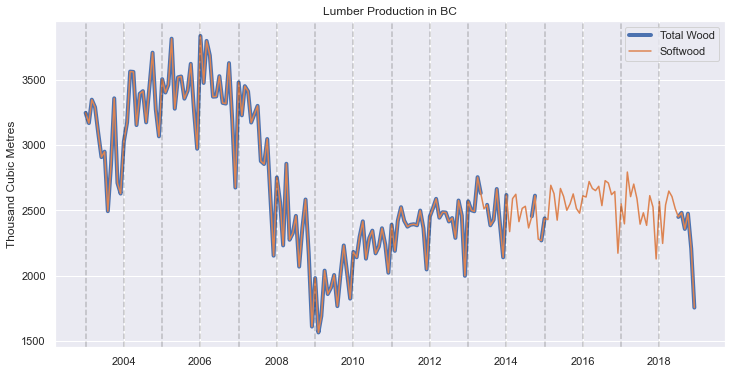

In [16]:
# visualize the data
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_total, label='Total Wood', linewidth=4)
ax.plot(df_soft, label='Softwood')
ax.set_title('Lumber Production in BC')
ax.set_ylabel('Thousand Cubic Metres')
ax.legend()

vline = np.arange("2003", "2019", dtype="datetime64[Y]")
for i in vline:
    plt.axvline(x=i, color="black", alpha=0.2, linestyle="--")
    
plt.show()

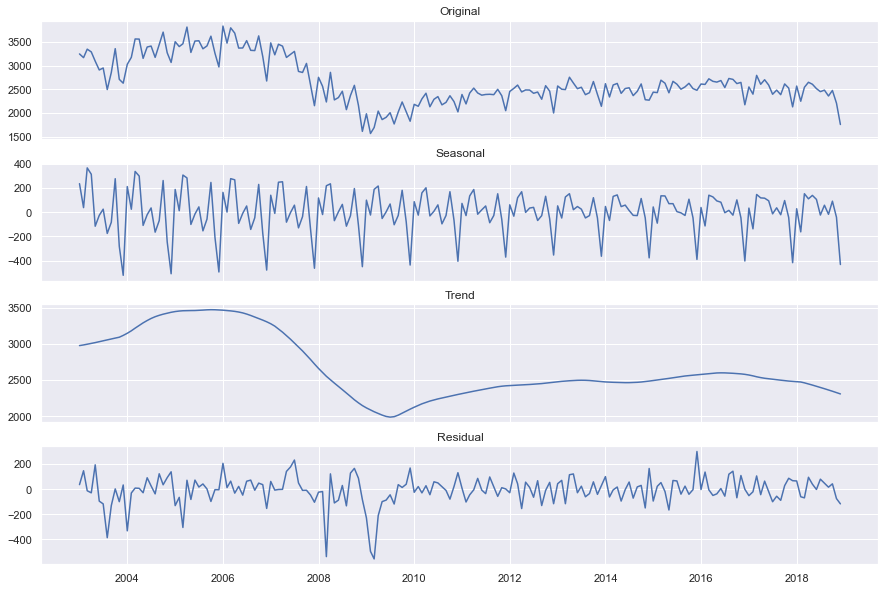

In [17]:
# Seasonal-Trend decomposition
from statsmodels.tsa.seasonal import STL

result = STL(endog=df_soft['VALUE'], period=12, seasonal=13, robust=True).fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(15,10))
axs[0].plot(df_soft['VALUE'])
axs[0].set_title('Original')
axs[1].plot(seasonal)
axs[1].set_title('Seasonal')
axs[2].plot(trend)
axs[2].set_title('Trend')
axs[3].plot(resid)
axs[3].set_title('Residual')
plt.show()

In [18]:
# check where the null values are
df_null = df_total.isna()
df_null[df_null['VALUE']==True].index

DatetimeIndex(['2013-06-01', '2014-02-01', '2014-04-01', '2014-05-01',
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-11-01',
               '2015-02-01', '2015-04-01', '2015-06-01', '2015-08-01',
               '2015-10-01', '2015-12-01', '2016-02-01', '2016-03-01',
               '2016-05-01', '2016-07-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-05-01', '2017-06-01', '2017-08-01', '2017-09-01',
               '2017-11-01', '2018-01-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='REF_DATE', freq=None)

In [19]:
# modeling total wood production is essentially modeling total softwood production
# trim the series at the 1st appearance of null value
df_trimmed = df_total.loc[:'2013-05-01']

## Determining parameters for the model

### Check stationarity with Augmented Dickey-Fuller test

In [20]:
import time
start = time.time()

In [21]:
# function to create all combinations of differencing orders as needed
def differencing(timeseries, m):
    info = []
    
    # "general" differencing only (d = 0 or 1 or 2)
    for i in range(3):
        timeseries.name = f"d{i}_D0_m0"
        info.append(timeseries)
        timeseries = timeseries.diff()
    
    # seasonal differencing (D = 1) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j].diff(periods=i)
            timeseries.name = f"d{j}_D1_m{i}"
            info.append(timeseries)
    
    # seasonal differencing (D = 2) given d = 0 or 1 or 2
    for i in m:
        for j in range(3):
            timeseries = info[j+3].diff(periods=i)
            timeseries.name = f"d{j}_D2_m{i}"
            info.append(timeseries)
            
    return pd.DataFrame(info).T

In [22]:
# create the differenced series
diff_series = differencing(df_trimmed['VALUE'], [12])
diff_series

,d0_D0_m0,d1_D0_m0,d2_D0_m0,d0_D1_m12,d1_D1_m12,d2_D1_m12,d0_D2_m12,d1_D2_m12,d2_D2_m12
REF_DATE,,,,,,,,,
2003-01-01,3246.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-01,3168.4,-78.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-01,3347.6,179.2,257.6,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,3289.4,-58.2,-237.4,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01,3094.3,-195.1,-136.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2013-01-01,2570.3,570.1,1030.9,116.3,165.1,310.8,53.0,127.0,174.6
2013-02-01,2501.5,-68.8,-638.9,-17.7,-134.0,-299.1,-345.6,-398.6,-525.6
2013-03-01,2494.0,-7.5,61.3,-95.2,-77.5,56.5,-262.8,82.8,481.4


In [23]:
# function to create a summary of test results of all the series

def adf_summary(diff_series):
    from statsmodels.tsa.stattools import adfuller
    summary = []
    
    for i in diff_series:
        # unpack the results
        a, b, c, d, e, f = adfuller(diff_series[i].dropna())
        g, h, i = e.values()
        results = [a, b, c, d, g, h, i]
        summary.append(results)
    
    columns = ["Test Statistic", "p-value", "#Lags Used", "No. of Obs. Used",
               "Critical Value (1%)", "Critical Value (5%)", "Critical Value (10%)"]
    index = diff_series.columns
    summary = pd.DataFrame(summary, index=index, columns=columns)
    
    return summary

In [24]:
# create the summary
summary = adf_summary(diff_series)

# filter away results that are not stationary
summary_passed = summary[summary["p-value"] < 0.05]
summary_passed

,Test Statistic,p-value,#Lags Used,No. of Obs. Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
d2_D0_m0,-8.440068,1.773074e-13,11,111,-3.490683,-2.887952,-2.580857
d1_D1_m12,-16.358276,2.887396e-29,0,111,-3.490683,-2.887952,-2.580857
d2_D1_m12,-7.150124,3.157034e-10,7,103,-3.495493,-2.890037,-2.581971
d1_D2_m12,-4.159329,7.715036e-04,12,87,-3.507853,-2.895382,-2.584824
d2_D2_m12,-3.824160,2.669581e-03,12,86,-3.508783,-2.895784,-2.585038


In [25]:
# output indices as a list
index_list = pd.Index.tolist(summary_passed.index)

# use the list as a condition to select stationary time-series
passed_series = diff_series[index_list]

# sort the columns by names
ps = passed_series.sort_index(axis=1)

### Calculate ACF & PACF for the resulting series

In [26]:
# store all values of significant spikes by nlags in PACF plots
from statsmodels.tsa.stattools import pacf

# create an empty dataframe to store values
df_sp_p = pd.DataFrame()
AR = []
for i in ps:
    # unpack the results into PACF and their CI
    PACF, PACF_ci = pacf(ps[i].dropna(), alpha=0.05, method='ywm')
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    PACF_ci_ll = PACF_ci[:,0] - PACF
    PACF_ci_ul = PACF_ci[:,1] - PACF
    
    # find positions of significant spikes ~ possible value of p & P
    sp1 = np.where(PACF < PACF_ci_ll)[0]
    sp2 = np.where(PACF > PACF_ci_ul)[0]
    
    # PACF values of the significant spikes
    sp1_value = abs(PACF[PACF < PACF_ci_ll])
    sp2_value = PACF[PACF > PACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_p = pd.concat((df_sp_p, sp1_series, sp2_series), axis=1)

In [27]:
# store all values of significant spikes by nlags in ACF plots
from statsmodels.tsa.stattools import acf

# create an empty dataframe to store values
df_sp_q = pd.DataFrame()
MA = []
for i in ps:
    # unpack the results into ACF and their CI
    ACF, ACF_ci = acf(ps[i].dropna(), alpha=0.05)
    
    # subtract the upper and lower limits of CI by ACF to centre CI at zero
    ACF_ci_ll = ACF_ci[:,0] - ACF
    ACF_ci_ul = ACF_ci[:,1] - ACF
    
    # find positions of significant spikes ~ possible value of q & Q
    sp1 = np.where(ACF < ACF_ci_ll)[0]
    sp2 = np.where(ACF > ACF_ci_ul)[0]
    
    # ACF values of the significant spikes
    sp1_value = abs(ACF[ACF < ACF_ci_ll])
    sp2_value = ACF[ACF > ACF_ci_ul]
    
    # store values to dataframe
    sp1_series = pd.Series(sp1_value, index=sp1)
    sp2_series = pd.Series(sp2_value, index=sp2)
    df_sp_q = pd.concat((df_sp_q, sp1_series, sp2_series), axis=1)

<AxesSubplot:title={'center':'Possible MA Terms'}, xlabel='nth lag', ylabel='Sum of ACF'>

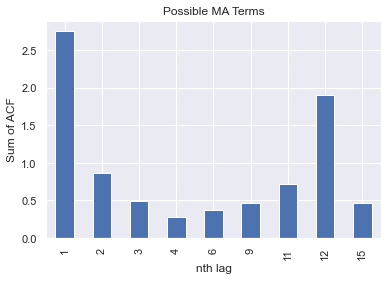

In [28]:
# visualize sums of values of significant spikes by nlags in ACF plots
df_sp_q.iloc[1:].T.sum().plot(kind='bar', title='Possible MA Terms', xlabel='nth lag', ylabel='Sum of ACF')

In [ ]:
# visualize sums of values of significant spikes by nlags in PACF plots
df_sp_p.iloc[1:].T.sum().plot(kind='bar', title='Possible AR Terms', xlabel='nth lag', ylabel='Sum of PACF')

## Building the SARIMA models

In [ ]:
# create a function to generate combinations of input list of no.
def pdq_grid(p, d, q):
    pdq = []
    for i in p:
        for j in d:
            for k in q:
                pdq.append([i, j, k])
    return pdq

def PDQm_grid(P, D, Q, m):
    PDQm = []
    for i in P:
        for j in D:
            for k in Q:
                for l in m:
                    PDQm.append([i, j, k, l])
    return PDQm

In [ ]:
# possible values of the parameters
p = [1, 2, 11]
d = [1, 2]
q = [1, 2, 11]
P = [1]
D = [0, 1, 2]
Q = [1]
m = [12]

# create all combinations of possible values
pdq = pdq_grid(p, d, q)
PDQm = PDQm_grid(P, D, Q, m)

In [ ]:
# create a function for semi-grid-searching SARIMA
def SARIMA_grid(endog, order, seasonal_order):

    # create an empty list to store values
    model_info = []
    
    # filter away errors & warnings due to failture to converge, LU decomposition errors, etc
    import warnings
    warnings.simplefilter("ignore")
    
    #fit the model
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from statsmodels.tools.eval_measures import rmse
    for i in order:
        for j in seasonal_order:
            try:
                model = SARIMAX(endog=endog, order=i, seasonal_order=j)
                result = model.fit()
                predict = result.predict()
            
                # calculate evaluation metrics: MAPE, RMSE, AIC & BIC
                MAPE = (abs((endog-predict)[1:])/(endog[1:])).mean()
                RMSE = rmse(endog[1:], predict[1:])
                AIC = result.aic
                BIC = result.bic
            
                # create a list of order, seasonal order & evaluation metrics
                info = [i, j, MAPE, RMSE, AIC, BIC]
                model_info.append(info)
                
            except:
                continue
            
    # create a dataframe to store info of all models
    columns = ["order", "seasonal_order", "MAPE", "RMSE", "AIC", "BIC"]
    model_info = pd.DataFrame(data=model_info, columns=columns)
    return model_info

In [ ]:
# create train-test-split
train = df_trimmed['VALUE'].iloc[:int(len(df_trimmed)*0.8)]
test = df_trimmed['VALUE'].iloc[int(len(df_trimmed)*0.8):]

In [34]:
# fit all combinations into the model
model_info = SARIMA_grid(endog=train, order=pdq, seasonal_order=PDQm)

In [35]:
end = time.time()
print(f'time required: {end - start}')

time required: 97.50771021842957


In [36]:
# save the results
model_info.to_csv(path_or_buf='sarima_semi_model.csv')

## Model evaluation and selection

In [37]:
# 10 least MAPE models
least_MAPE = model_info.nsmallest(10, "MAPE")
least_MAPE

,order,seasonal_order,MAPE,RMSE,AIC,BIC
39,"[11, 1, 2]","[1, 0, 1, 12]",0.048418,173.586656,1335.341076,1376.862993
24,"[2, 1, 11]","[1, 0, 1, 12]",0.049209,175.659722,1328.383180,1369.905097
6,"[1, 1, 11]","[1, 0, 1, 12]",0.049899,178.742640,1330.599446,1369.526244
42,"[11, 1, 11]","[1, 0, 1, 12]",0.050069,169.997537,1344.200928,1409.078924
36,"[11, 1, 1]","[1, 0, 1, 12]",0.051001,179.815913,1332.126695,1371.053493
21,"[2, 1, 2]","[1, 0, 1, 12]",0.053085,185.769797,1321.288242,1339.454081
18,"[2, 1, 1]","[1, 0, 1, 12]",0.053880,185.047603,1318.847580,1334.418299
0,"[1, 1, 1]","[1, 0, 1, 12]",0.054283,188.947787,1319.560720,1332.536319
3,"[1, 1, 2]","[1, 0, 1, 12]",0.054365,188.498611,1323.284566,1338.855285
43,"[11, 1, 11]","[1, 1, 1, 12]",0.054598,221.749932,1179.329724,1240.977427


In [38]:
# 10 least RMSE models
least_RMSE = model_info.nsmallest(10, "RMSE")
least_RMSE

,order,seasonal_order,MAPE,RMSE,AIC,BIC
42,"[11, 1, 11]","[1, 0, 1, 12]",0.050069,169.997537,1344.200928,1409.078924
39,"[11, 1, 2]","[1, 0, 1, 12]",0.048418,173.586656,1335.341076,1376.862993
24,"[2, 1, 11]","[1, 0, 1, 12]",0.049209,175.659722,1328.383180,1369.905097
6,"[1, 1, 11]","[1, 0, 1, 12]",0.049899,178.742640,1330.599446,1369.526244
36,"[11, 1, 1]","[1, 0, 1, 12]",0.051001,179.815913,1332.126695,1371.053493
18,"[2, 1, 1]","[1, 0, 1, 12]",0.053880,185.047603,1318.847580,1334.418299
21,"[2, 1, 2]","[1, 0, 1, 12]",0.053085,185.769797,1321.288242,1339.454081
3,"[1, 1, 2]","[1, 0, 1, 12]",0.054365,188.498611,1323.284566,1338.855285
0,"[1, 1, 1]","[1, 0, 1, 12]",0.054283,188.947787,1319.560720,1332.536319
43,"[11, 1, 11]","[1, 1, 1, 12]",0.054598,221.749932,1179.329724,1240.977427


In [39]:
# 10 least AIC models
least_AIC = model_info.nsmallest(10, "AIC")
least_AIC

,order,seasonal_order,MAPE,RMSE,AIC,BIC
11,"[1, 2, 1]","[1, 2, 1, 12]",0.099817,473.085757,1027.463068,1038.983394
29,"[2, 2, 1]","[1, 2, 1, 12]",0.099927,473.033188,1029.359692,1043.184083
14,"[1, 2, 2]","[1, 2, 1, 12]",0.099896,473.040830,1029.372758,1043.197149
32,"[2, 2, 2]","[1, 2, 1, 12]",0.100555,473.687136,1032.141093,1048.269549
2,"[1, 1, 1]","[1, 2, 1, 12]",0.080066,386.506189,1037.362442,1048.949882
20,"[2, 1, 1]","[1, 2, 1, 12]",0.079907,386.705697,1039.710254,1053.615182
23,"[2, 1, 2]","[1, 2, 1, 12]",0.080068,386.507677,1041.362508,1057.584925
5,"[1, 1, 2]","[1, 2, 1, 12]",0.080937,389.337456,1043.088103,1056.993032
47,"[11, 2, 1]","[1, 2, 1, 12]",0.100511,469.777656,1045.371259,1079.932236
50,"[11, 2, 2]","[1, 2, 1, 12]",0.098695,468.192764,1052.153925,1089.018967


In [40]:
# 10 least BIC models
least_BIC = model_info.nsmallest(10, "BIC")
least_BIC # the 1st 6 least BIC models are the same as the 1st 6 least AIC models

,order,seasonal_order,MAPE,RMSE,AIC,BIC
11,"[1, 2, 1]","[1, 2, 1, 12]",0.099817,473.085757,1027.463068,1038.983394
29,"[2, 2, 1]","[1, 2, 1, 12]",0.099927,473.033188,1029.359692,1043.184083
14,"[1, 2, 2]","[1, 2, 1, 12]",0.099896,473.040830,1029.372758,1043.197149
32,"[2, 2, 2]","[1, 2, 1, 12]",0.100555,473.687136,1032.141093,1048.269549
2,"[1, 1, 1]","[1, 2, 1, 12]",0.080066,386.506189,1037.362442,1048.949882
20,"[2, 1, 1]","[1, 2, 1, 12]",0.079907,386.705697,1039.710254,1053.615182
5,"[1, 1, 2]","[1, 2, 1, 12]",0.080937,389.337456,1043.088103,1056.993032
23,"[2, 1, 2]","[1, 2, 1, 12]",0.080068,386.507677,1041.362508,1057.584925
47,"[11, 2, 1]","[1, 2, 1, 12]",0.100511,469.777656,1045.371259,1079.932236
8,"[1, 1, 11]","[1, 2, 1, 12]",0.081215,384.305567,1053.043882,1087.806203


In [41]:
# the least by each metric
L1 = model_info[model_info.MAPE == model_info.MAPE.min()]
L2 = model_info[model_info.RMSE == model_info.RMSE.min()]
L3 = model_info[model_info.AIC == model_info.AIC.min()]
L4 = least_BIC[least_BIC.MAPE == least_BIC.MAPE.min()]

pd.concat((L1, L2, L3, L4))

,order,seasonal_order,MAPE,RMSE,AIC,BIC
39,"[11, 1, 2]","[1, 0, 1, 12]",0.048418,173.586656,1335.341076,1376.862993
42,"[11, 1, 11]","[1, 0, 1, 12]",0.050069,169.997537,1344.200928,1409.078924
11,"[1, 2, 1]","[1, 2, 1, 12]",0.099817,473.085757,1027.463068,1038.983394
20,"[2, 1, 1]","[1, 2, 1, 12]",0.079907,386.705697,1039.710254,1053.615182


In [42]:
# In this case, models with least MAPE are also models with least RMSE, but ranked slightly different.
set(least_MAPE.index) & set(least_RMSE.index)

{0, 3, 6, 18, 21, 24, 36, 39, 42, 43}

In [43]:
# fit the models of least MAPE, least RMSE, least AIC/BIC & least MAPE among least AIC/BIC
order_list = [(11,1,2), (11,1,11), (1,2,1), (2,1,1)]
seasonal_order_list = [(1,0,1,12), (1,0,1,12), (1,2,1,12), (1,2,1,12)]
y = df_trimmed['VALUE']
pred_list = []
y1 = [] # prediction confidence interval lower boundary
y2 = [] # prediction confidence interval upper boundary

for i in range(4):
    model = SARIMAX(endog=train, order=order_list[i],
                    seasonal_order=seasonal_order_list[i])
    result = model.fit()
    pred_summary = result.get_prediction(y.index[0], y.index[-1]).summary_frame()
    pred_list.append(pred_summary['mean'])
    y1.append(pred_summary['mean_ci_lower'][test.index])
    y2.append(pred_summary['mean_ci_upper'][test.index])

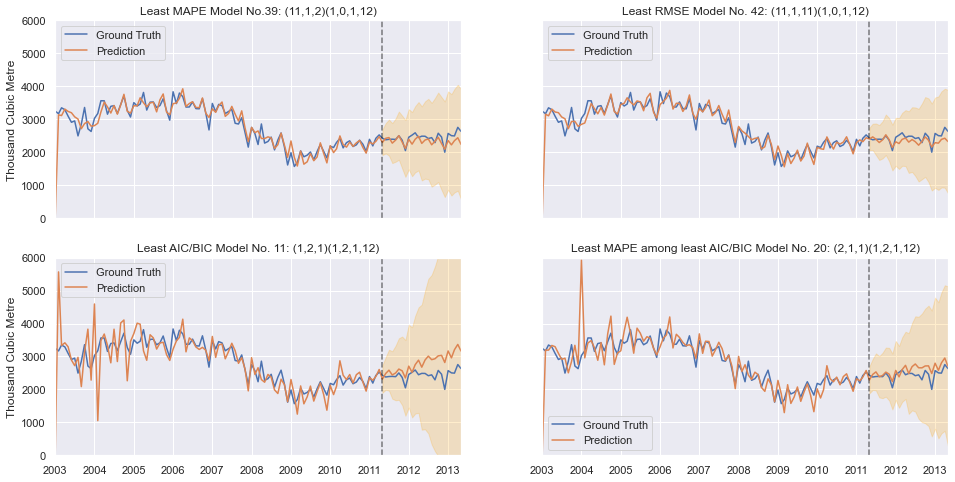

In [44]:
# visualize the results of the fitted models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8),
                        sharex=True, sharey=True)

titles = ['Least MAPE Model No.39: (11,1,2)(1,0,1,12)',
          'Least RMSE Model No. 42: (11,1,11)(1,0,1,12)',
          'Least AIC/BIC Model No. 11: (1,2,1)(1,2,1,12)',
          'Least MAPE among least AIC/BIC Model No. 20: (2,1,1)(1,2,1,12)']
k = 0
for i in range(2):
    for j in range(2):
        axs[i,j].plot(y, label='Ground Truth')
        axs[i,j].plot(pred_list[k], label='Prediction')
        axs[i,j].set_title(titles[k])
        axs[i,0].set_ylabel('Thousand Cubic Metre')
        axs[i,j].legend()
        axs[i,j].axvline(test.index[0], color='black', alpha=0.5, linestyle='--')
        axs[i,j].fill_between(x=test.index, y1=y1[k], y2=y2[k], color='orange', alpha=0.2)
        axs[i,j].set_ylim(bottom=0, top=6000)
        axs[i,j].set_xlim(left=y.index[0], right=y.index[-1])
        k += 1
plt.show()

In [45]:
# CV for models with top performance in both MAPE & RMSE
from statsmodels.tools.eval_measures import rmse

gd_mod_cv = []
for i in least_MAPE.index:
    model = SARIMAX(endog=train, order=least_MAPE.order[i],
                    seasonal_order=least_MAPE.seasonal_order[i])
    result = model.fit()
    pred = result.get_prediction(test.index[0], test.index[-1]).summary_frame()['mean']
    CV_MAPE = (abs((test-pred))/(test)).mean()
    CV_RMSE = rmse(test, pred)
    cv_result = [least_MAPE.order[i], least_MAPE.seasonal_order[i], CV_MAPE, CV_RMSE]
    gd_mod_cv.append(cv_result)

columns = ['order', 'seasonal_order', 'CV_MAPE', 'CV_RMSE']
index = least_MAPE.index
gd_mod_cv = pd.DataFrame(data=gd_mod_cv, index=index, columns=columns)

In [46]:
# Cross-validation results of the models
pd.concat((least_MAPE, gd_mod_cv.iloc[:,2:]), axis=1).sort_values('CV_MAPE')

,order,seasonal_order,MAPE,RMSE,AIC,BIC,CV_MAPE,CV_RMSE
6,"[1, 1, 11]","[1, 0, 1, 12]",0.049899,178.742640,1330.599446,1369.526244,0.041357,120.690535
3,"[1, 1, 2]","[1, 0, 1, 12]",0.054365,188.498611,1323.284566,1338.855285,0.043374,129.033350
18,"[2, 1, 1]","[1, 0, 1, 12]",0.053880,185.047603,1318.847580,1334.418299,0.043841,130.439806
0,"[1, 1, 1]","[1, 0, 1, 12]",0.054283,188.947787,1319.560720,1332.536319,0.045761,138.876448
36,"[11, 1, 1]","[1, 0, 1, 12]",0.051001,179.815913,1332.126695,1371.053493,0.046252,140.150725
21,"[2, 1, 2]","[1, 0, 1, 12]",0.053085,185.769797,1321.288242,1339.454081,0.048073,148.127122
42,"[11, 1, 11]","[1, 0, 1, 12]",0.050069,169.997537,1344.200928,1409.078924,0.052134,161.509580
39,"[11, 1, 2]","[1, 0, 1, 12]",0.048418,173.586656,1335.341076,1376.862993,0.054811,171.223164
43,"[11, 1, 11]","[1, 1, 1, 12]",0.054598,221.749932,1179.329724,1240.977427,0.056334,172.258590
24,"[2, 1, 11]","[1, 0, 1, 12]",0.049209,175.659722,1328.383180,1369.905097,0.086284,256.993203


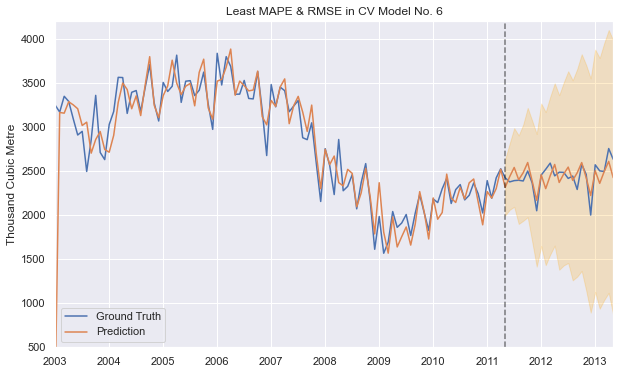

In [47]:
# fit the least CV MAPE model and visualize OOB prediction with CI
model = SARIMAX(endog=train, order=(1,1,11), seasonal_order=(1,0,1,12))
result = model.fit()
pred_summary = result.get_prediction(df_trimmed.index[0], df_trimmed.index[-1]).summary_frame()
pred = pred_summary['mean']
pred_ci_ll = pred_summary['mean_ci_lower'][test.index]
pred_ci_ul = pred_summary['mean_ci_upper'][test.index]

fig, ax = plt.subplots()
pd.concat([df_trimmed["VALUE"], pred], axis=1).plot(title='Least MAPE & RMSE in CV Model No. 6',
                                                    ylabel='Thousand Cubic Metre', ax=ax,
                                                    ylim=(500, 4200), figsize=(10,6))
ax.legend(['Ground Truth', 'Prediction'])
plt.fill_between(x=test.index, y1=pred_ci_ll, y2=pred_ci_ul, color='orange', alpha=0.2)
plt.axvline(x=test.index[0], color="black", alpha=0.5, linestyle="--")

#### Model no. 6 is the winner! But, (d = 1, D = 0) it's not stationary!

#### Well, supposedly not stationary......according to ADF test.

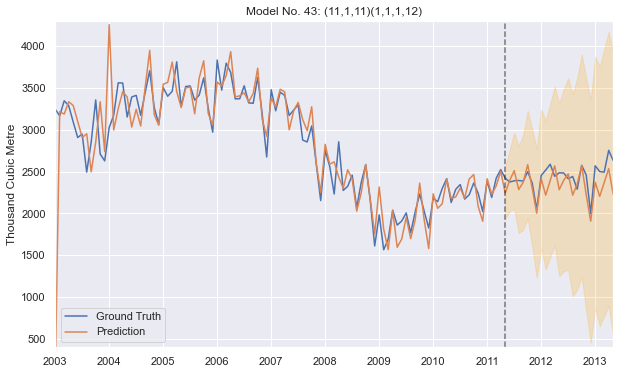

In [48]:
# fit the only (supposedly) stationary model (according to ADF test) in the top 10 least MAPE models
model = SARIMAX(endog=train, order=(11,1,11), seasonal_order=(1,1,1,12))
result = model.fit()
pred_summary = result.get_prediction(df_trimmed.index[0], df_trimmed.index[-1]).summary_frame()
pred = pred_summary['mean']
pred_ci_ll = pred_summary['mean_ci_lower'][test.index]
pred_ci_ul = pred_summary['mean_ci_upper'][test.index]

fig, ax = plt.subplots()
pd.concat([df_trimmed["VALUE"], pred], axis=1).plot(title='Model No. 43: (11,1,11)(1,1,1,12)',
                                                    ylabel='Thousand Cubic Metre', ax=ax,
                                                    ylim=(400, 4300), figsize=(10,6))
ax.legend(['Ground Truth', 'Prediction'])
plt.fill_between(x=test.index, y1=pred_ci_ll, y2=pred_ci_ul, color='orange', alpha=0.2)
plt.axvline(x=test.index[0], color="black", alpha=0.5, linestyle="--")

#### Refit the models with the entire series (train + test), i.e., df_trimmed, then make forecast up to Dec 2016.

#### For comparison, 2 of the best models selected by auto_arima of pmdarima are shown here too.

In [49]:
# using auto_arima to select the best models
import pmdarima as pm

# exhaustive grid-search
gs_model = pm.auto_arima(df_trimmed['VALUE'], max_p=11, max_q=11,
                         max_D=2, max_P=1 , max_Q=1,  m=12,
                         information_criterion='oob', trace=True,
                         out_of_sample_size=len(test), 
                         error_action='ignore', max_order=None, stepwise=False)

# stepwise search
step_model = pm.auto_arima(df_trimmed['VALUE'], m=12, information_criterion='oob',
                           trace=True, out_of_sample_size=len(test),
                           error_action='ignore', max_order=None)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : OOB=31995.684, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : OOB=186183.966, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : OOB=14034.949, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : OOB=61276.635, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : OOB=59341.977, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : OOB=121040.258, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : OOB=13413.049, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : OOB=28710.208, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : OOB=60775.681, Time=0.11 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : OOB=134953.479, Time=0.23 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : OOB=13412.291, Time=0.21 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : OOB=24167.819, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : OOB=49560.397, Time=0.13 sec
 ARIMA(0,1,3)(0,0,1)[12] intercept   : OOB=132959.933, Time=0.28 sec
 ARIMA(0,1,3)(1,0,0)[12] intercept   : OOB=1

In [50]:
# df_trimmed = df_soft up to the 1st occurrence of NaN in df_trimmed
# train-test-split will be created using df_soft instead
from pandas.tseries.offsets import DateOffset

big_train = df_soft['VALUE'].loc[df_trimmed.index]
big_test = df_soft['VALUE'].loc[df_trimmed.index[-1]+DateOffset(months=1):'2014-12-01']

In [51]:
# fit model no. 6, no. 43, least OOB MSE model by grid-search &
# least OOB MSE model by stepwise search from results of auto_arima
from statsmodels.tools.eval_measures import rmse

order_list = [(1,1,11), (11,1,11), (9,1,0), (1,1,0)]
seasonal_order_list = [(1,0,1,12), (1,1,1,12), (1,0,1,12), (1,0,0,12)]
pred_list = []
y1 = [] # prediction confidence interval lower boundary
y2 = [] # prediction confidence interval upper boundary
gd_mod_cv = []

for i in range(4):
    model = SARIMAX(endog=big_train, order=order_list[i],
                    seasonal_order=seasonal_order_list[i])
    result = model.fit()
    pred_summary = result.get_prediction(y.index[0], '2014-12-01').summary_frame()
    pred = pred_summary['mean']
    pred_list.append(pred)
    y1.append(pred_summary['mean_ci_lower'][big_test.index])
    y2.append(pred_summary['mean_ci_upper'][big_test.index])
    CV_MAPE = (abs((big_test - pred[big_test.index]))/(big_test)).mean()
    CV_RMSE = rmse(big_test, pred[big_test.index])
    AIC = result.aic
    BIC = result.bic
    cv_result = [order_list[i], seasonal_order_list[i], CV_MAPE, CV_RMSE, AIC, BIC]
    gd_mod_cv.append(cv_result)
    
columns = ['order', 'seasonal_order', 'CV_MAPE', 'CV_RMSE', 'AIC', 'BIC']
index = [6, 43, 'grid', 'stepwise']
gd_mod_cv = pd.DataFrame(data=gd_mod_cv, index=index, columns=columns)
gd_mod_cv

,order,seasonal_order,CV_MAPE,CV_RMSE,AIC,BIC
6,"(1, 1, 11)","(1, 0, 1, 12)",0.087842,227.608189,1645.144400,1687.448624
43,"(11, 1, 11)","(1, 1, 1, 12)",0.080357,226.596379,1491.193938,1559.156410
grid,"(9, 1, 0)","(1, 0, 1, 12)",0.076355,204.351412,1639.818361,1673.661740
stepwise,"(1, 1, 0)","(1, 0, 0, 12)",0.100596,272.384661,1642.510581,1650.971426


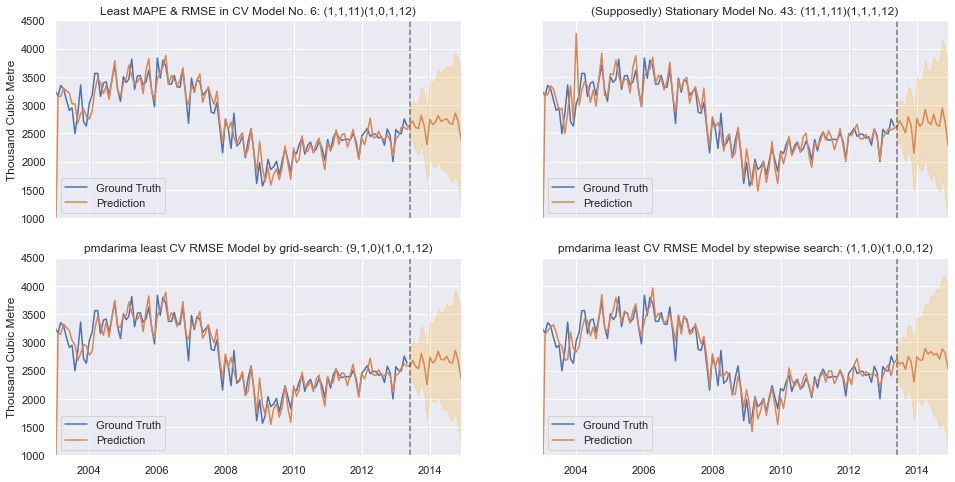

In [52]:
# visualize the results of the fitted models
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8),
                        sharex=True, sharey=True)

titles = ['Least MAPE & RMSE in CV Model No. 6: (1,1,11)(1,0,1,12)',
          '(Supposedly) Stationary Model No. 43: (11,1,11)(1,1,1,12)',
          'pmdarima least CV RMSE Model by grid-search: (9,1,0)(1,0,1,12)',
          'pmdarima least CV RMSE Model by stepwise search: (1,1,0)(1,0,0,12)']

k = 0
for i in range(2):
    for j in range(2):
        axs[i,j].plot(y, label='Ground Truth')
        axs[i,j].plot(pred_list[k], label='Prediction')
        axs[i,j].set_title(titles[k])
        axs[i,0].set_ylabel('Thousand Cubic Metre')
        axs[i,j].legend()
        axs[i,j].axvline(big_test.index[0], color='black', alpha=0.5, linestyle='--')
        axs[i,j].fill_between(x=big_test.index, y1=y1[k], y2=y2[k], color='orange', alpha=0.2)
        axs[i,j].set_ylim(bottom=1000, top=4500)
        axs[i,j].set_xlim(left=y.index[0], right=big_test.index[-1])
        k += 1
plt.show()